# Importing Libraries 

In [61]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Removing Whitespaces and tokenization 

In [62]:
# Function to remove leading/trailing whitespace and reduce multiple spaces
def remove_whitespaces(text):
    return re.sub(r'\s+', ' ', text.strip())

# Function to tokenize text
def tokenize(text):
    # First, removes whitespaces
    text = remove_whitespaces(text)
    # Splits the text into tokens based on spaces
    return text.split()


In [63]:
# Loads the data from the JSON files
with open('preprocessedRedditData.json', 'r') as jsonFile:
    redditData = json.load(jsonFile)

with open('preprocessedYoutubeData.json', 'r') as jsonFile:
    youtubeData = json.load(jsonFile)


In [64]:
# Removes whitespaces from fields in the Reddit data
for entry in redditData:
    entry['title'] = remove_whitespaces(entry['title'])  
    entry['date'] = remove_whitespaces(entry['date'])    
    entry['keyword'] = remove_whitespaces(entry['keyword'])  
    for comment in entry['comments']:
        comment['comment_body'] = remove_whitespaces(comment['comment_body']) 

# Tokenizes fields in the Reddit data
for entry in redditData:
    entry['title_tokens'] = tokenize(entry['title'])  # Tokenize title
    entry['keyword_tokens'] = tokenize(entry['keyword'])  # Tokenize keyword
    for comment in entry['comments']:
        comment['comment_tokens'] = tokenize(comment['comment_body'])  # Tokenize comments

 #Can't print Reddit tokens as there is too many 


In [65]:
# Removes whitespaces from fields in the YouTube data
for entry in youtubeData:
    entry['title'] = remove_whitespaces(entry['title'])  # Removes whitespaces from title
    entry['date'] = remove_whitespaces(entry['date'])    # Removes whitespaces from date
    entry['keyword'] = remove_whitespaces(entry['keyword'])  # Removes whitespaces from keyword
    for comment in entry['comments']:
        comment['comment_body'] = remove_whitespaces(comment['comment_body'])  # Removes whitespaces from comments

# Tokenizes fields in the YouTube data
for entry in youtubeData:
    entry['title_tokens'] = tokenize(entry['title'])  # Tokenize title
    entry['keyword_tokens'] = tokenize(entry['keyword'])  # Tokenize keyword
    for comment in entry['comments']:
        comment['comment_tokens'] = tokenize(comment['comment_body'])  # Tokenize comments

# Prints tokens for YouTube data
print("YouTube Data Tokens:")
for entry in youtubeData:
    print(f"Title Tokens: {entry['title_tokens']}")
    print(f"Keyword Tokens: {entry['keyword_tokens']}")
    for comment in entry['comments']:
        print(f"Comment Tokens: {comment['comment_tokens']}")
    print()  


YouTube Data Tokens:
Title Tokens: ['rise', 'ai', 'gaming']
Keyword Tokens: ['AI', 'in', 'games']
Comment Tokens: ['really', 'wanna', 'play', 'game', 'story', 'line', 'written', 'ai', 'depending', 'action', 'word', 'also', 'dream', 'ultimate', 'game', 'mixing', 'three', 'type', 'ai', 'story', 'one', 'generative', 'ai', 'powered', 'imagine', 'enter', 'something', 'like', 'skyrim', 'get', 'new', 'map', 'find', 'unique', 'artefact', 'nobody', 'find', 'meet', 'character', 'possibly', 'exist', 'playthrough', 'hope', 'ill', 'chance', 'play', 'game']
Comment Tokens: ['aspiring', 'programmerthis', 'aim', 'merging', 'ai', 'gaming']
Comment Tokens: ['hello', 'hello']
Comment Tokens: ['hello', 'client', 'product', 'want', 'work', 'interested', 'paid', 'cooperation']
Comment Tokens: ['helloi', 'absolutely', 'loved', 'video', 'content', 'truly', 'engaging', 'id', 'love', 'explore', 'potential', 'paid', 'collaboration', 'youre', 'interested', 'could', 'kindly', 'share', 'email', 'discus']
Comment To

In [66]:
# Saves the cleaned and tokenized data back to the preprocessed JSON files
with open('preprocessedRedditData.json', 'w') as jsonFile:
    json.dump(redditData, jsonFile, indent=4)

with open('preprocessedYoutubeData.json', 'w') as jsonFile:
    json.dump(youtubeData, jsonFile, indent=4)

print("Whitespaces removed, tokens created for all relevant fields, and data saved successfully.")


Whitespaces removed, tokens created for all relevant fields, and data saved successfully.


# Term Frequency, Document Frequency and TFIDF analysis 

In [67]:
# Prepares the comments for TF-IDF calculation
reddit_comments = [' '.join([comment['comment_body'] for comment in entry['comments']]) for entry in redditData]
youtube_comments = [' '.join([comment['comment_body'] for comment in entry['comments']]) for entry in youtubeData]


In [68]:

# Creates a TF-IDF Vectorizer for Reddit
tfidf_vectorizer_reddit = TfidfVectorizer()
reddit_tfidf_matrix = tfidf_vectorizer_reddit.fit_transform(reddit_comments)

# Calculates Document Frequency for Reddit
reddit_df = np.count_nonzero(reddit_tfidf_matrix.toarray(), axis=0)  # Document Frequency
df_terms_reddit = tfidf_vectorizer_reddit.get_feature_names_out()

# Creates a DataFrame for Reddit DF
reddit_df_table = pd.DataFrame({
    'term': df_terms_reddit,
    'doc_freq': reddit_df
})

# Sorts the DataFrame by document frequency and get the top terms
reddit_df_table_sorted = reddit_df_table.sort_values(by='doc_freq', ascending=False).head(20)


In [69]:
# Displays the DataFrame for Reddit
print("Top Terms and Document Frequencies for Reddit:")
print(reddit_df_table_sorted)


Top Terms and Document Frequencies for Reddit:
         term  doc_freq
21377    like      1114
26126     one      1053
15040     get      1051
18120      im      1026
10399    dont       996
42785   would       994
38534    time       976
12192    even       971
15528    good       964
22297    make       963
30373  really       958
38266   think       929
27511  people       921
20523    know       917
1147     also       914
38248   thing       905
24264    much       898
33396     see       895
41883     way       889
41688    want       880


In [70]:
# Creates TF-IDF DataFrame for Reddit
reddit_tfidf_array = reddit_tfidf_matrix.toarray()
reddit_tfidf_table = pd.DataFrame(reddit_tfidf_array, columns=df_terms_reddit)

# Displays the top TF-IDF scores for Reddit
reddit_tfidf_mean = reddit_tfidf_table.mean(axis=0).sort_values(ascending=False)
reddit_tfidf_table_sorted = pd.DataFrame({
    'term': reddit_tfidf_mean.index,
    'tfidf_score': reddit_tfidf_mean.values
}).head(20)


In [71]:
# Displays the DataFrame for Reddit TF-IDF
print("\nTop Terms and TF-IDF Scores for Reddit:")
print(reddit_tfidf_table_sorted)



Top Terms and TF-IDF Scores for Reddit:
      term  tfidf_score
0     game     0.075008
1     like     0.053106
2       ai     0.042016
3   people     0.037326
4      get     0.037109
5       im     0.034642
6     dont     0.032942
7      one     0.029992
8    would     0.028637
9     time     0.027755
10     oop     0.024803
11   thing     0.024082
12    even     0.023293
13    make     0.023080
14    good     0.022929
15  really     0.022665
16   think     0.022644
17    play     0.021842
18    need     0.021698
19    know     0.021522


In [72]:
# Creates a TF-IDF Vectorizer for YouTube
tfidf_vectorizer_youtube = TfidfVectorizer()
youtube_tfidf_matrix = tfidf_vectorizer_youtube.fit_transform(youtube_comments)

# Calculates Document Frequency for YouTube
youtube_df = np.count_nonzero(youtube_tfidf_matrix.toarray(), axis=0)  # Document Frequency
df_terms_youtube = tfidf_vectorizer_youtube.get_feature_names_out()

# Creates a DataFrame for YouTube DF
youtube_df_table = pd.DataFrame({
    'term': df_terms_youtube,
    'doc_freq': youtube_df
})

# Sorts the DataFrame by document frequency and get the top terms
youtube_df_table_sorted = youtube_df_table.sort_values(by='doc_freq', ascending=False).head(20)


In [73]:
# Displays the DataFrame for YouTube
print("\nTop Terms and Document Frequencies for YouTube:")
print(youtube_df_table_sorted)



Top Terms and Document Frequencies for YouTube:
         term  doc_freq
3689     game        92
5361     like        86
4530       im        84
3828      get        81
9927    video        79
3915     good        78
6425      one        78
2598     dont        77
6884     play        75
6207      new        74
5583     make        73
5464     look        71
9330     time        70
6729   people        70
7448   really        69
3041     even        68
6173     need        68
10375    year        67
1299     cant        67
10298   would        66


In [74]:
# Creates TF-IDF DataFrame for YouTube
youtube_tfidf_array = youtube_tfidf_matrix.toarray()
youtube_tfidf_table = pd.DataFrame(youtube_tfidf_array, columns=df_terms_youtube)

# Displays the top TF-IDF scores for YouTube
youtube_tfidf_mean = youtube_tfidf_table.mean(axis=0).sort_values(ascending=False)
youtube_tfidf_table_sorted = pd.DataFrame({
    'term': youtube_tfidf_mean.index,
    'tfidf_score': youtube_tfidf_mean.values
}).head(20)


In [75]:
# Displays the DataFrame for YouTube TF-IDF
print("\nTop Terms and TF-IDF Scores for YouTube:")
print(youtube_tfidf_table_sorted)



Top Terms and TF-IDF Scores for YouTube:
      term  tfidf_score
0     game     0.175143
1     like     0.069947
2       ai     0.064016
3     look     0.052627
4    video     0.040979
5       im     0.039739
6     play     0.032834
7     good     0.031766
8     dont     0.030544
9     make     0.029575
10     one     0.028978
11     get     0.026181
12    year     0.025889
13    time     0.025244
14  really     0.024320
15    doom     0.024203
16     new     0.023965
17   would     0.023168
18     bro     0.022253
19    know     0.022166


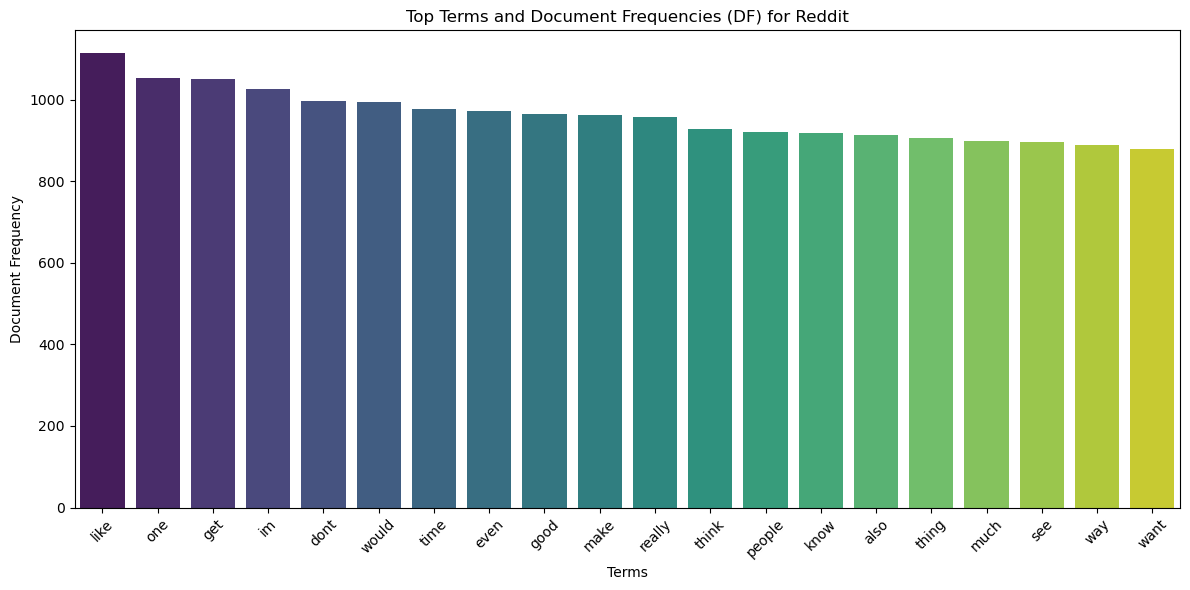

In [76]:
# Visualizing Document Frequencies (DF) for Reddit
plt.figure(figsize=(12, 6))
sns.barplot(x=reddit_df_table_sorted['term'], y=reddit_df_table_sorted['doc_freq'], palette='viridis')
plt.title("Top Terms and Document Frequencies (DF) for Reddit")
plt.xlabel("Terms")
plt.ylabel("Document Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


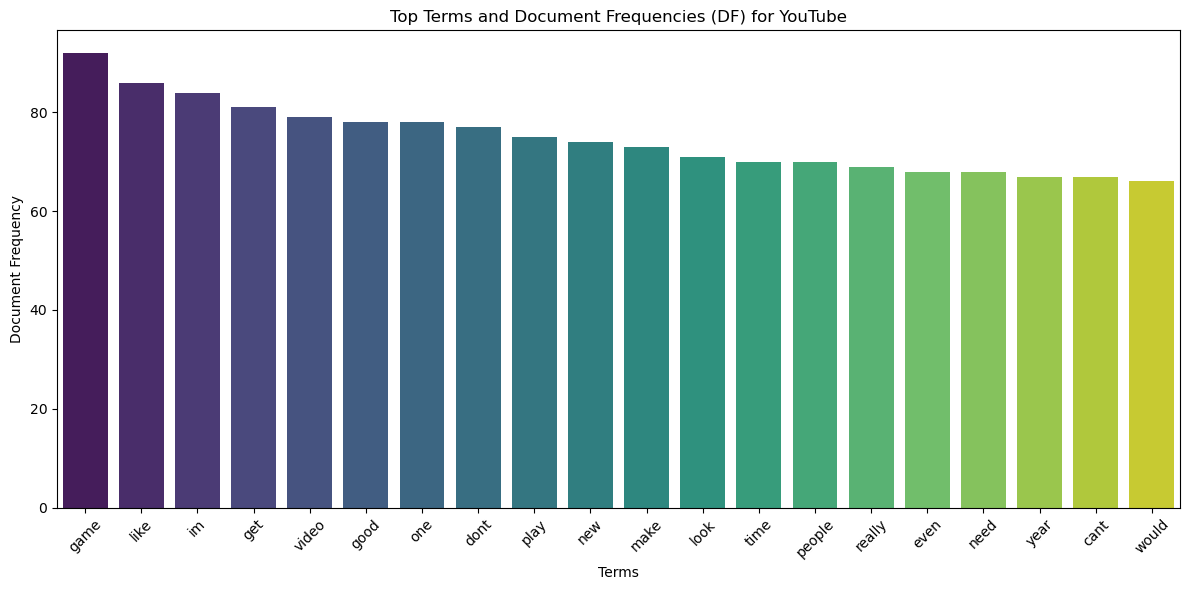

In [77]:
# Visualizing Document Frequencies (DF) for YouTube
plt.figure(figsize=(12, 6))
sns.barplot(x=youtube_df_table_sorted['term'], y=youtube_df_table_sorted['doc_freq'], palette='viridis')
plt.title("Top Terms and Document Frequencies (DF) for YouTube")
plt.xlabel("Terms")
plt.ylabel("Document Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


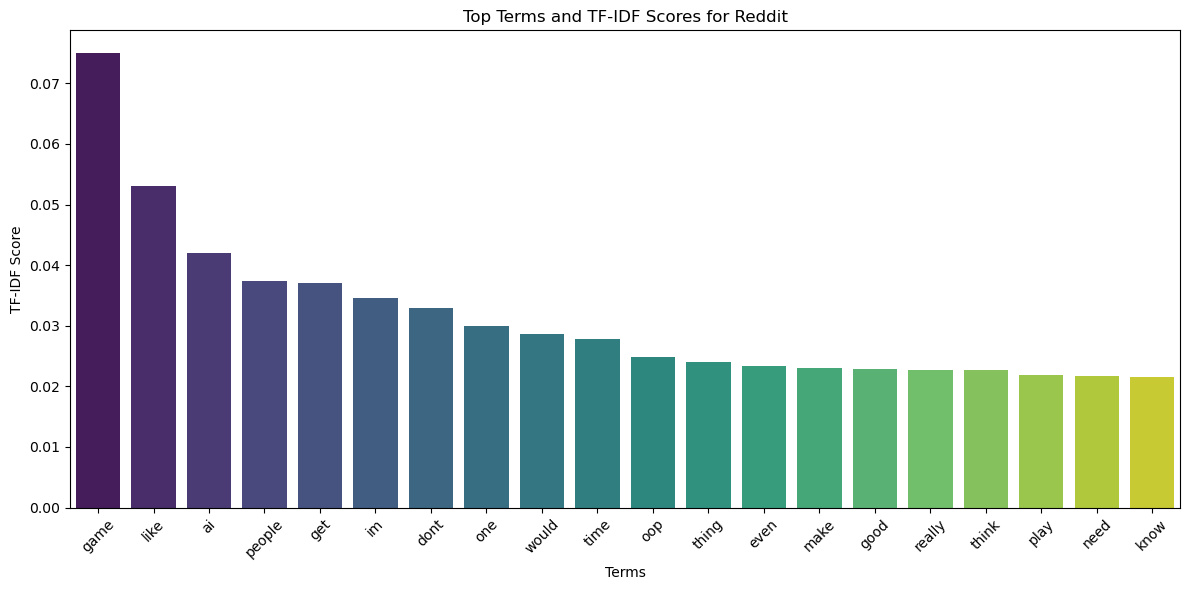

In [78]:
# Visualizing TF-IDF Scores for Reddit
plt.figure(figsize=(12, 6))
sns.barplot(x=reddit_tfidf_table_sorted['term'], y=reddit_tfidf_table_sorted['tfidf_score'], palette='viridis')
plt.title("Top Terms and TF-IDF Scores for Reddit")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


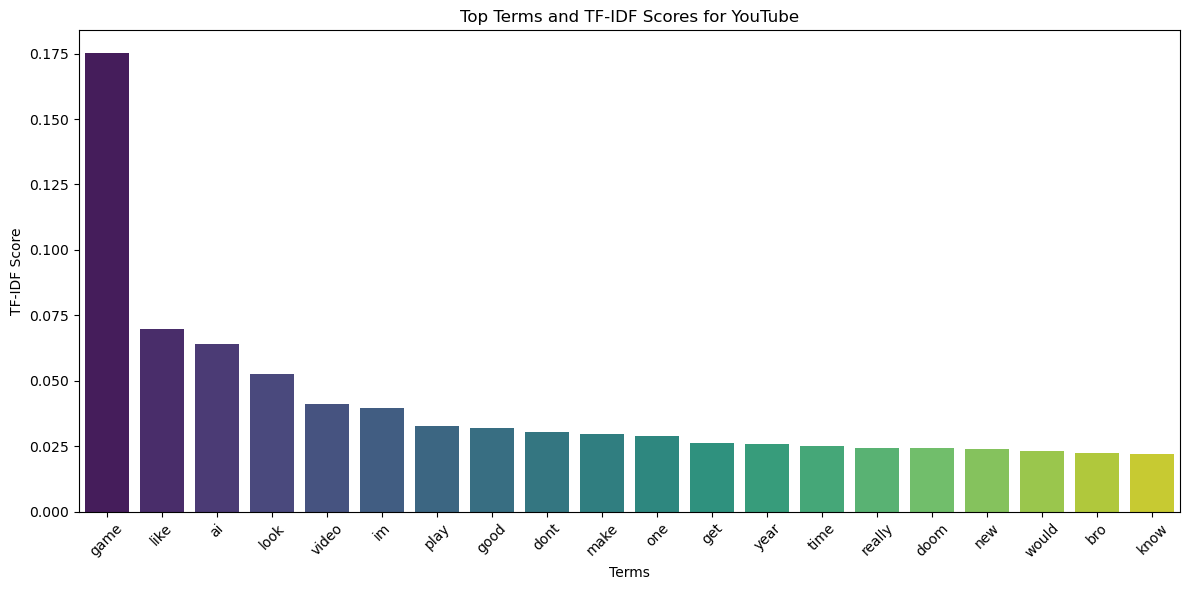

In [79]:
# Visualizing TF-IDF Scores for YouTube
plt.figure(figsize=(12, 6))
sns.barplot(x=youtube_tfidf_table_sorted['term'], y=youtube_tfidf_table_sorted['tfidf_score'], palette='viridis')
plt.title("Top Terms and TF-IDF Scores for YouTube")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Time series analysis 

In [80]:
# Extracting dates and count the number of comments for each date in Reddit
reddit_date_counts = {}
for entry in redditData:
    date = entry['date']  
    comment_count = len(entry['comments'])  # Counts the number of comments
    if date in reddit_date_counts:
        reddit_date_counts[date] += comment_count  # Adds to existing count
    else:
        reddit_date_counts[date] = comment_count  # Initializing the count

# Converting the date counts into a DataFrame
reddit_dates_df = pd.DataFrame(list(reddit_date_counts.items()), columns=['date', 'comment_count'])
reddit_dates_df['date'] = pd.to_datetime(reddit_dates_df['date'])
reddit_dates_df = reddit_dates_df.sort_values('date')


In [81]:
# Extracting dates and count the number of comments for each date in YouTube
youtube_date_counts = {}
for entry in youtubeData:
    date = entry['date'] 
    comment_count = len(entry['comments'])  # Counts the number of comments
    if date in youtube_date_counts:
        youtube_date_counts[date] += comment_count  # Adds to existing count
    else:
        youtube_date_counts[date] = comment_count  # Initializing the count

# Converting the date counts into a DataFrame
youtube_dates_df = pd.DataFrame(list(youtube_date_counts.items()), columns=['date', 'comment_count'])
youtube_dates_df['date'] = pd.to_datetime(youtube_dates_df['date'])
youtube_dates_df = youtube_dates_df.sort_values('date')


In [82]:
# Aggregating data to weekly counts for Reddit
reddit_dates_df.set_index('date', inplace=True)
reddit_weekly_df = reddit_dates_df.resample('W').sum().reset_index()

# Aggregating data to weekly counts for YouTube
youtube_dates_df.set_index('date', inplace=True)
youtube_weekly_df = youtube_dates_df.resample('W').sum().reset_index()


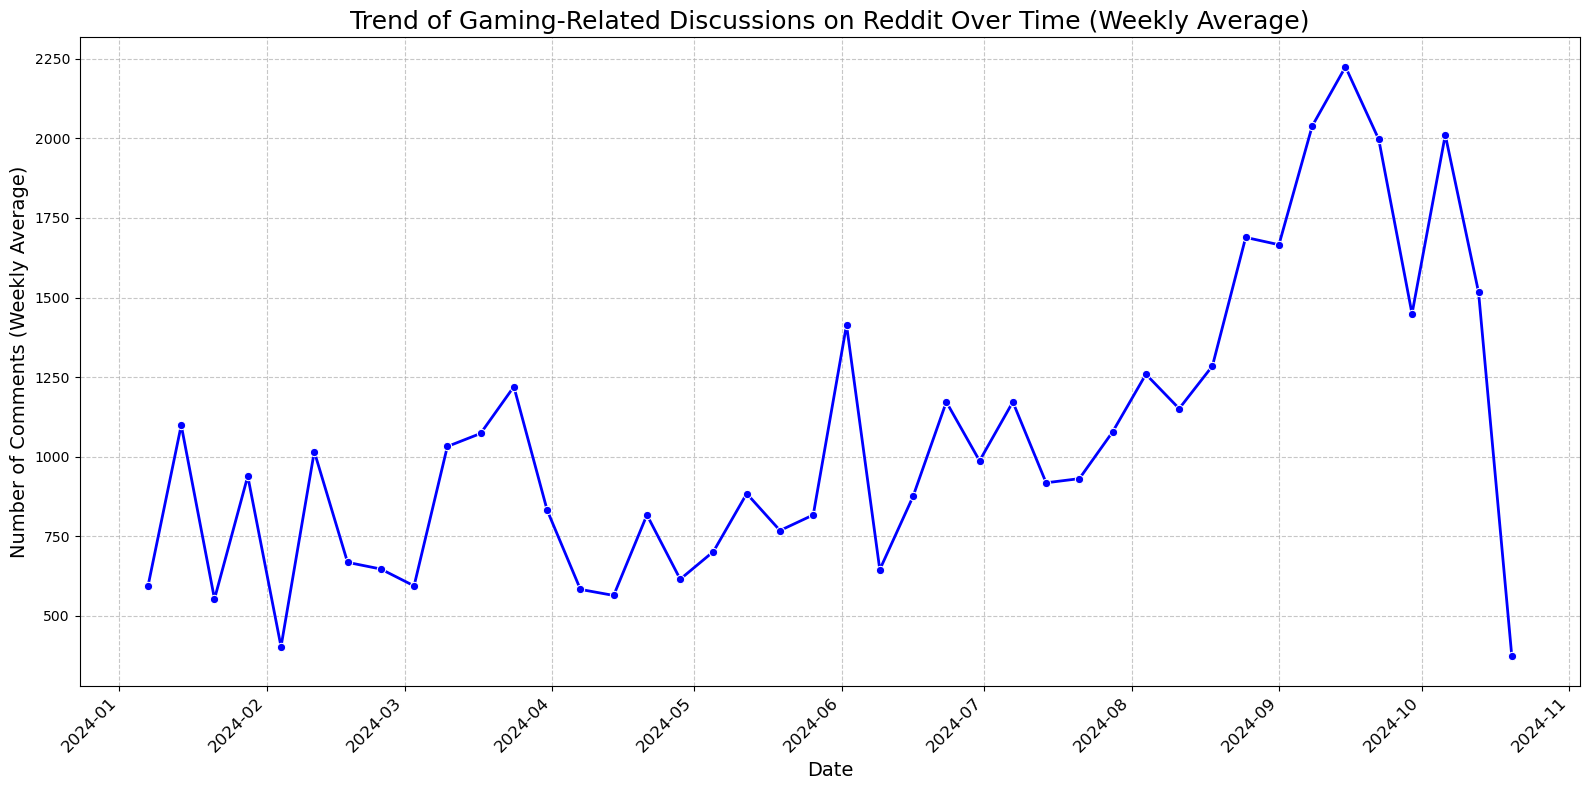

In [83]:
# Visualizing weekly average time series data for Reddit
plt.figure(figsize=(16, 8))

# Plotting the data with a thicker line
sns.lineplot(data=reddit_weekly_df, x='date', y='comment_count', marker='o', linestyle='-', color='b', markersize=6, linewidth=2)

# Title and labels
plt.title("Trend of Gaming-Related Discussions on Reddit Over Time (Weekly Average)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Comments (Weekly Average)", fontsize=14)

# Enhancing x-axis date formatting
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


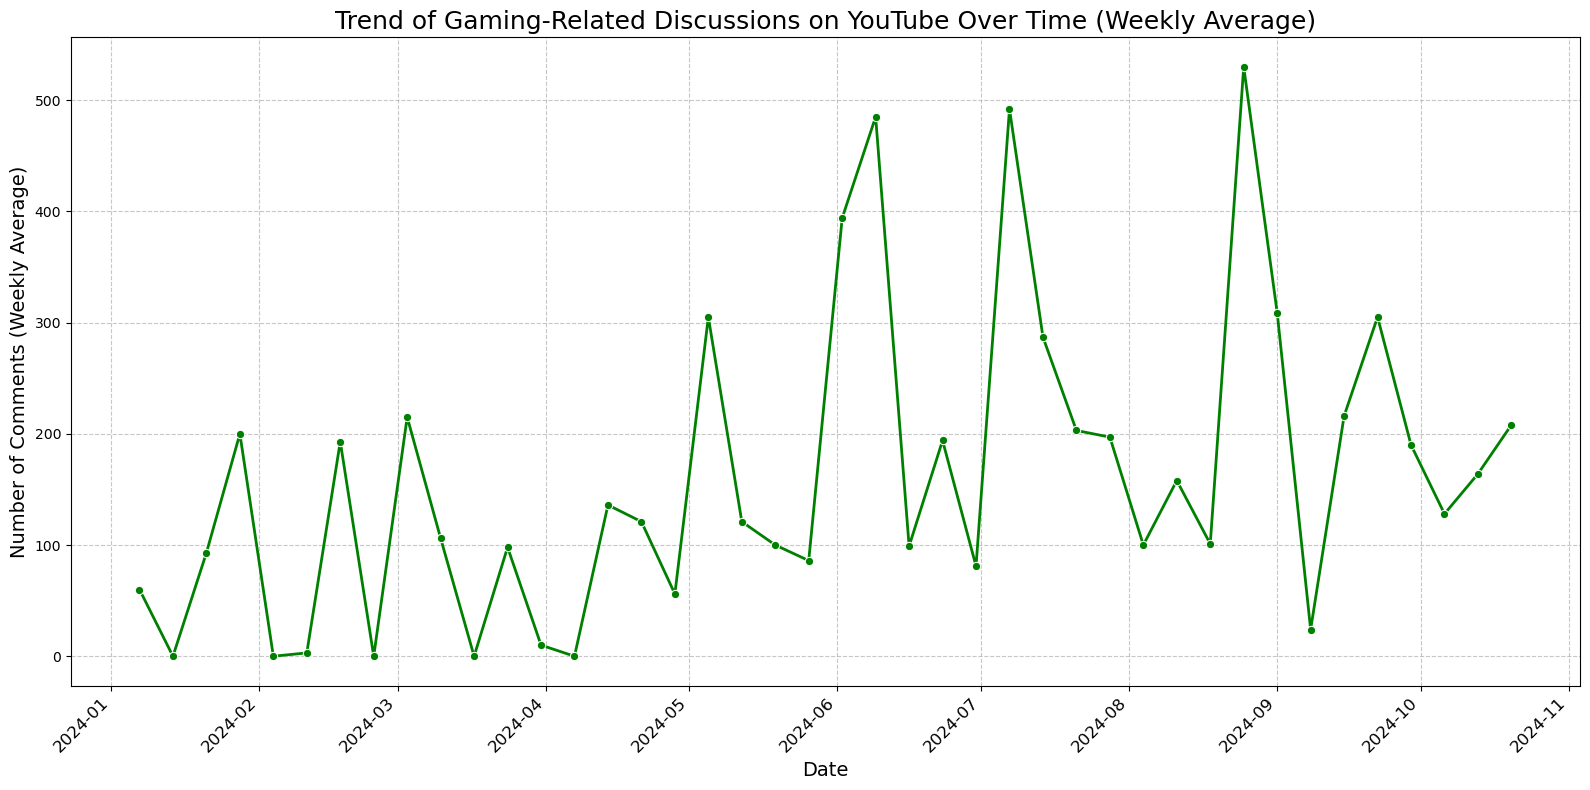

In [84]:
# Visualizing weekly average time series data for YouTube
plt.figure(figsize=(16, 8))

# Plotting the data with a thicker line
sns.lineplot(data=youtube_weekly_df, x='date', y='comment_count', marker='o', linestyle='-', color='g', markersize=6, linewidth=2)

# Title and labels
plt.title("Trend of Gaming-Related Discussions on YouTube Over Time (Weekly Average)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Comments (Weekly Average)", fontsize=14)

# Enhancing x-axis date formatting
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Sentiment Analysis 

In [85]:
#Importing 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Downloading VADER lexicon 
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\happy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [86]:
# Initializing VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Analyzing sentiment for Reddit comments
reddit_comments_with_sentiment = []
for entry in redditData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  # Get sentiment scores
        comment['sentiment_score'] = score['compound']  # Store the compound score
        reddit_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
reddit_comments_df = pd.DataFrame(reddit_comments_with_sentiment)


In [87]:
# Calculating positive, neutral, and negative sentiment scores for Reddit comments
reddit_comments_df['positive'] = reddit_comments_df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)
reddit_comments_df['neutral'] = reddit_comments_df['sentiment_score'].apply(lambda x: 1 if x == 0 else 0)
reddit_comments_df['negative'] = reddit_comments_df['sentiment_score'].apply(lambda x: 1 if x < 0 else 0)

# Grouping by comments to get the total count for each sentiment
reddit_sentiment_summary = reddit_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
reddit_sentiment_summary.columns = ['Sentiment', 'Count']

# Display the sentiment summary for Reddit
print("Reddit Sentiment Summary:")
print(reddit_sentiment_summary)


Reddit Sentiment Summary:
  Sentiment  Count
0  positive  22862
1   neutral   7486
2  negative  13924


In [88]:
# Analyzing sentiment for YouTube comments
youtube_comments_with_sentiment = []
for entry in youtubeData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  # Get sentiment scores
        comment['sentiment_score'] = score['compound']  # Store the compound score
        youtube_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
youtube_comments_df = pd.DataFrame(youtube_comments_with_sentiment)


In [89]:
# Calculating positive, neutral, and negative sentiment scores for YouTube comments
youtube_comments_df['positive'] = youtube_comments_df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)
youtube_comments_df['neutral'] = youtube_comments_df['sentiment_score'].apply(lambda x: 1 if x == 0 else 0)
youtube_comments_df['negative'] = youtube_comments_df['sentiment_score'].apply(lambda x: 1 if x < 0 else 0)

# Grouping by comments to get the total count for each sentiment
youtube_sentiment_summary = youtube_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
youtube_sentiment_summary.columns = ['Sentiment', 'Count']

# Display the sentiment summary for YouTube
print("YouTube Sentiment Summary:")
print(youtube_sentiment_summary)


YouTube Sentiment Summary:
  Sentiment  Count
0  positive   3016
1   neutral   2170
2  negative   1582


In [90]:
# Calculating positive, neutral, and negative sentiment counts for Reddit
reddit_sentiment_summary = reddit_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
reddit_sentiment_summary.columns = ['Sentiment', 'Count']

# Calculating positive, neutral, and negative sentiment counts for YouTube
youtube_sentiment_summary = youtube_comments_df[['positive', 'neutral', 'negative']].sum().reset_index()
youtube_sentiment_summary.columns = ['Sentiment', 'Count']

# Combining summaries for Reddit and YouTube
combined_sentiment_summary = pd.DataFrame({
    'Platform': ['Reddit'] * 3 + ['YouTube'] * 3,
    'Sentiment': ['Positive', 'Neutral', 'Negative'] * 2,
    'Count': list(reddit_sentiment_summary['Count']) + list(youtube_sentiment_summary['Count'])
})

# Displaying the sentiment summary table
print("Sentiment Summary Table:")
print(combined_sentiment_summary)


Sentiment Summary Table:
  Platform Sentiment  Count
0   Reddit  Positive  22862
1   Reddit   Neutral   7486
2   Reddit  Negative  13924
3  YouTube  Positive   3016
4  YouTube   Neutral   2170
5  YouTube  Negative   1582


In [91]:
# Function to get frequent words from comments
def get_frequent_words(comments_df, sentiment='positive'):
    if sentiment == 'positive':
        filtered_comments = comments_df[comments_df['sentiment_score'] > 0]
    else:
        filtered_comments = comments_df[comments_df['sentiment_score'] < 0]

    # Combine all comments into a single string and split into words
    all_words = ' '.join(filtered_comments['comment_body']).split()
    
    # Count the frequency of each word
    most_common_words = Counter(all_words).most_common(10)  # Get top 10 words
    return most_common_words


In [92]:
# Analyzing sentiment for Reddit comments
reddit_comments_with_sentiment = []
for entry in redditData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  
        comment['sentiment_score'] = score['compound']  
        comment['positive'] = score['pos']  
        comment['neutral'] = score['neu']  
        comment['negative'] = score['neg']  
        reddit_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
reddit_comments_df = pd.DataFrame(reddit_comments_with_sentiment)

# Analyzing sentiment for YouTube comments
youtube_comments_with_sentiment = []
for entry in youtubeData:
    for comment in entry['comments']:
        score = sid.polarity_scores(comment['comment_body'])  
        comment['sentiment_score'] = score['compound']  
        comment['positive'] = score['pos'] 
        comment['neutral'] = score['neu']
        comment['negative'] = score['neg']  
        youtube_comments_with_sentiment.append(comment)

# Converting to DataFrame for easier analysis
youtube_comments_df = pd.DataFrame(youtube_comments_with_sentiment)


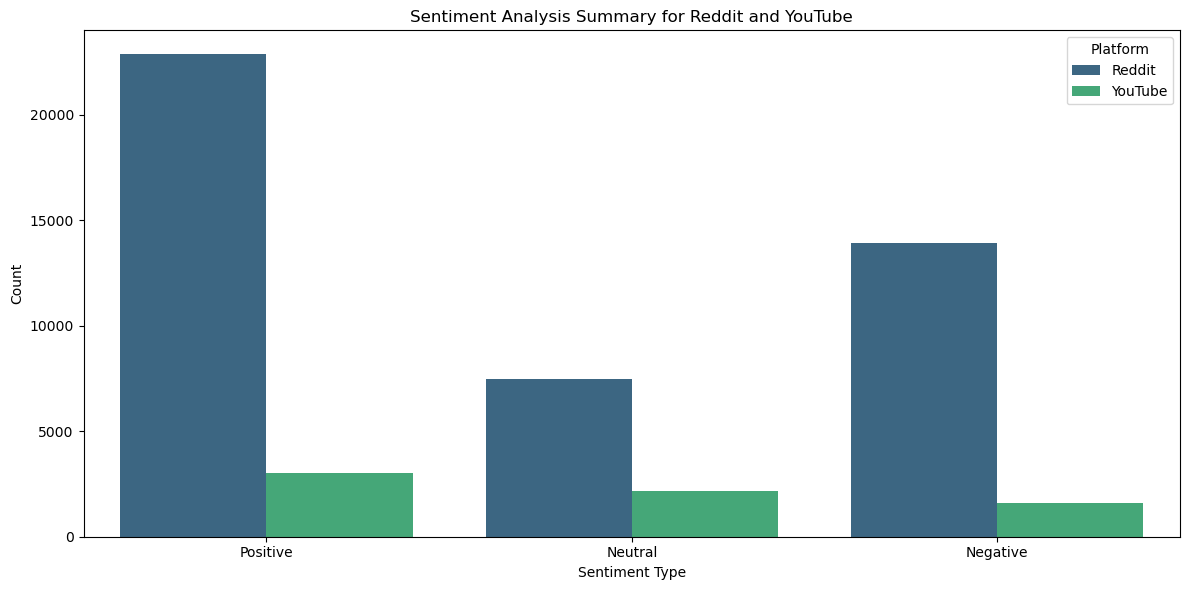

In [93]:
# Visualizing sentiment summary counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment', y='Count', hue='Platform', data=combined_sentiment_summary, palette='viridis')
plt.title("Sentiment Analysis Summary for Reddit and YouTube")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


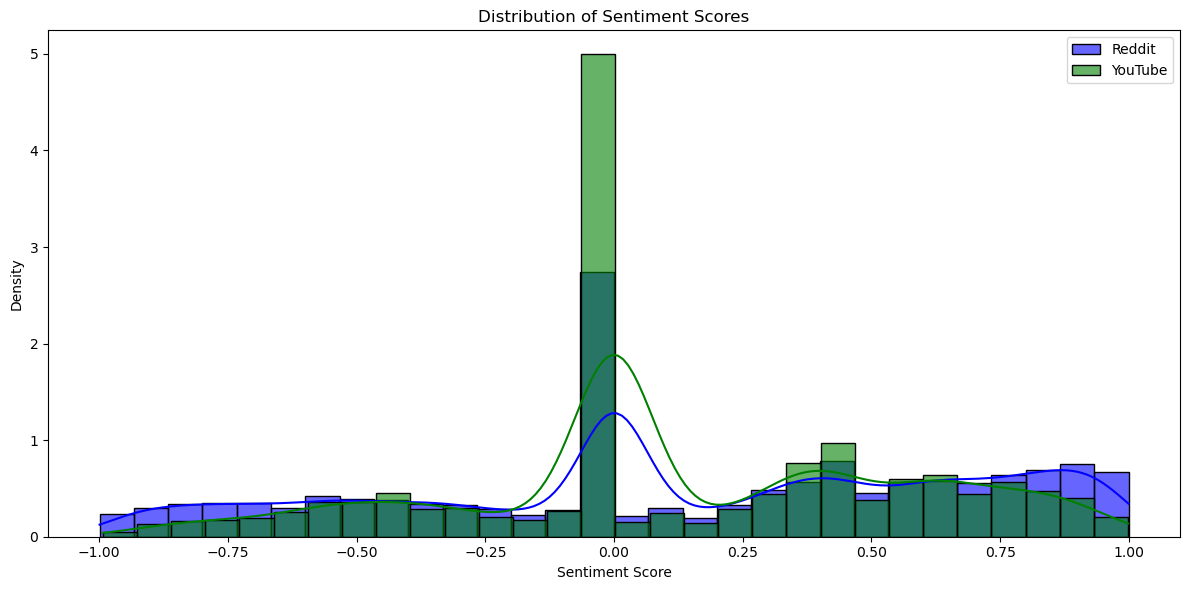

In [94]:
# Visualizing the distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(reddit_comments_df['sentiment_score'], bins=30, kde=True, color='blue', label='Reddit', stat='density', alpha=0.6)
sns.histplot(youtube_comments_df['sentiment_score'], bins=30, kde=True, color='green', label='YouTube', stat='density', alpha=0.6)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


# Word clouds 

In [95]:
!pip install wordcloud


In [96]:
from wordcloud import WordCloud


In [97]:
# Prepare text for word clouds
positive_reddit_text = ' '.join(reddit_comments_df[reddit_comments_df['sentiment_score'] > 0]['comment_body'])
negative_reddit_text = ' '.join(reddit_comments_df[reddit_comments_df['sentiment_score'] < 0]['comment_body'])

positive_youtube_text = ' '.join(youtube_comments_df[youtube_comments_df['sentiment_score'] > 0]['comment_body'])
negative_youtube_text = ' '.join(youtube_comments_df[youtube_comments_df['sentiment_score'] < 0]['comment_body'])


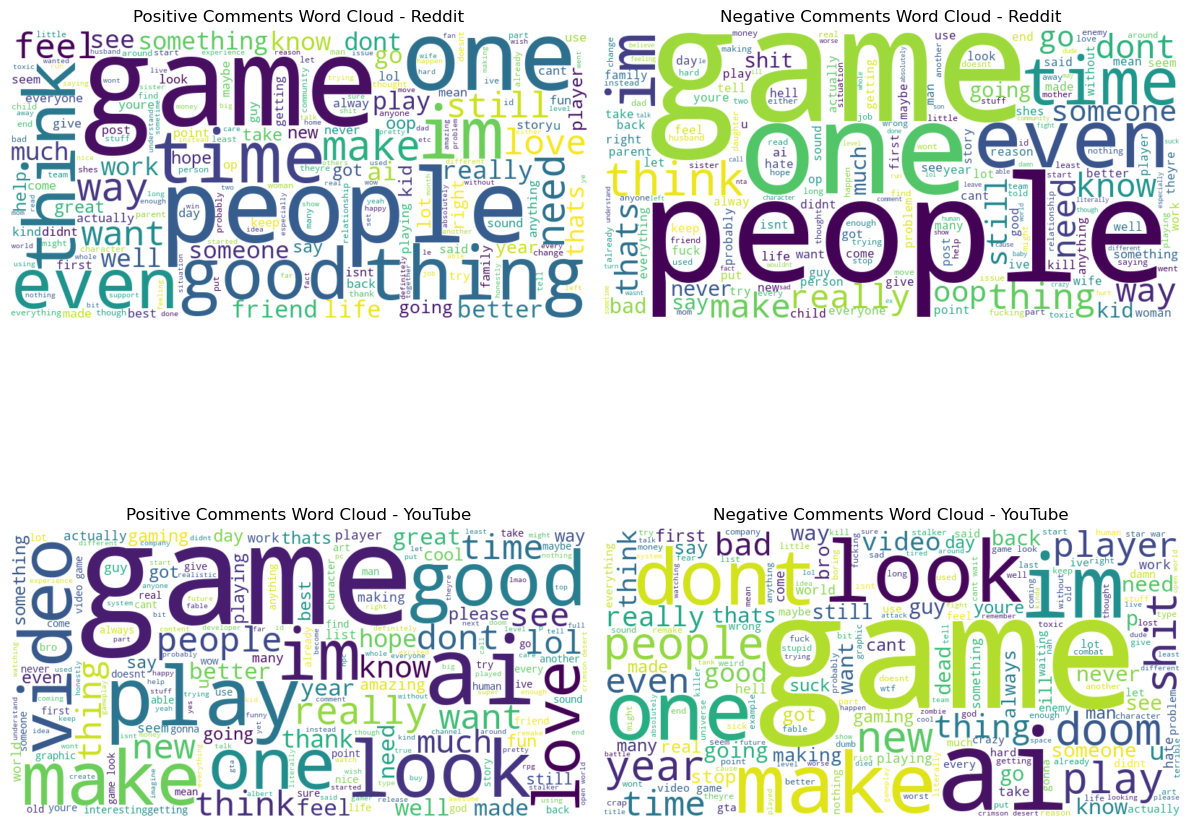

In [98]:
# Generate word clouds
wordcloud_positive_reddit = WordCloud(width=800, height=400, background_color='white').generate(positive_reddit_text)
wordcloud_negative_reddit = WordCloud(width=800, height=400, background_color='white').generate(negative_reddit_text)

wordcloud_positive_youtube = WordCloud(width=800, height=400, background_color='white').generate(positive_youtube_text)
wordcloud_negative_youtube = WordCloud(width=800, height=400, background_color='white').generate(negative_youtube_text)

# Plotting the word clouds
plt.figure(figsize=(12, 12))

# Reddit positive word cloud
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_positive_reddit, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments Word Cloud - Reddit')

# Reddit negative word cloud
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_negative_reddit, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments Word Cloud - Reddit')

# YouTube positive word cloud
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_positive_youtube, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments Word Cloud - YouTube')

# YouTube negative word cloud
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_negative_youtube, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments Word Cloud - YouTube')

plt.tight_layout()
plt.show()
